In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import io

def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    for i, line in enumerate(fin):
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = map(float, tokens[1:])
        if i > 100000:
            break
    return data

In [29]:
vectors = load_vectors('../../wiki-news-300d-1M.vec')

In [30]:
words = {w: np.array(list(vectors[w])) for w in vectors}

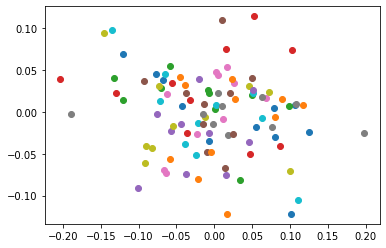

In [32]:
for i, w in enumerate(words):
    # print(words[w][0], words[w][1])
    plt.scatter(words[w][0], words[w][1])
    if i > 100:
        break

In [31]:
import fasttext

In [33]:
model1 = fasttext.load_model('../data/bin/fasttext_200_50.bin')
model2 = fasttext.load_model('../data/bin/fasttext_100.bin')
model3 = fasttext.load_model('../data/bin/fasttext_200.bin')

In [40]:
# song, music, ibiza, people, school, laptop, computer, sand, sky, player
word = 'sunset'

In [41]:
model1.get_nearest_neighbors(word)

[(0.8058708906173706, 'sunrise'),
 (0.6712239980697632, 'dusk'),
 (0.5894411206245422, 'twilight'),
 (0.5614661574363708, 'misty'),
 (0.5610998868942261, 'foggy'),
 (0.5566723942756653, 'lake'),
 (0.5564395189285278, 'sky'),
 (0.5441725254058838, 'mountains'),
 (0.5341526865959167, 'sunsets'),
 (0.5319316387176514, 'cloudy')]

In [42]:
model2.get_nearest_neighbors(word)

[(0.8635748028755188, 'sunrise'),
 (0.7530286908149719, 'sunrises'),
 (0.7514839172363281, 'dusk'),
 (0.7074742317199707, 'seacoast'),
 (0.6869329810142517, 'sundown'),
 (0.6849852204322815, 'sunsets'),
 (0.6809548139572144, 'twilight'),
 (0.6700689196586609, 'silhouetted'),
 (0.66090327501297, 'cloudy'),
 (0.6551900506019592, 'c1970')]

In [43]:
model3.get_nearest_neighbors(word)

[(0.8108305931091309, 'sunrise'),
 (0.7143994569778442, 'sunrises'),
 (0.705374538898468, 'sunsets'),
 (0.70113205909729, 'dusk'),
 (0.6429147720336914, 'twilight'),
 (0.5632219910621643, '60fps'),
 (0.5572551488876343, 'seacoast'),
 (0.5511749386787415, 'moonlight'),
 (0.5426387190818787, 'misty'),
 (0.5339328050613403, 'sky')]

In [37]:
%%timeit
model1.get_nearest_neighbors(word)

3.51 ms ± 11.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [38]:
%%timeit
model2.get_nearest_neighbors(word)

1.54 ms ± 8.23 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [39]:
%%timeit
model3.get_nearest_neighbors(word)

3.47 ms ± 5.54 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
